In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols=['sepal-length','sepal-width','petal-length','petal-width','species']
iris=pd.read_csv('/home/eeswar/Downloads/datasets/IRIS.csv',names=cols
                ,converters={'species':lambda x:x.split('-')[1]})
iris

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


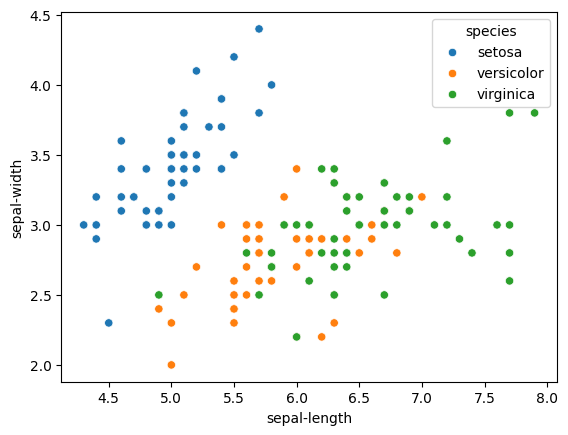

In [3]:
sns.scatterplot(x='sepal-length',y='sepal-width',data=iris,hue='species')
plt.show()

In [4]:
sales=pd.read_csv('/home/eeswar/Downloads/datasets/sales.csv',sep='\t')
sales

,sale_id,customer_id,product_category,region,sales_date,sales_amount,units_sold
0,1,101,Electronics,North,2024-01-15,500,2
1,2,102,Clothing,South,2024-02-20,150,3
2,3,103,Home Appliances,East,2024-03-10,300,1
3,4,101,Electronics,West,2024-04-12,450,1
4,5,104,Clothing,North,2024-05-18,120,2
5,6,105,Sports,South,2024-06-07,700,4
6,7,106,Electronics,North,2024-07-21,600,3
7,8,107,Home Appliances,East,2024-08-05,350,2
8,9,108,Sports,West,2024-09-14,650,3
9,10,109,Clothing,North,2024-10-02,200,4


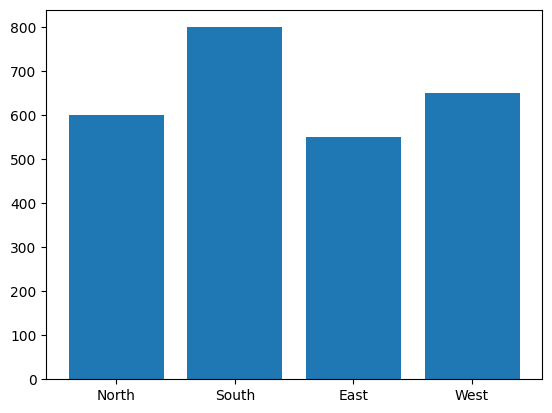

In [5]:
plt.bar(x='region',height='sales_amount',data=sales)
plt.show()

In [6]:
region=sales.groupby('region')['sales_amount'].sum()

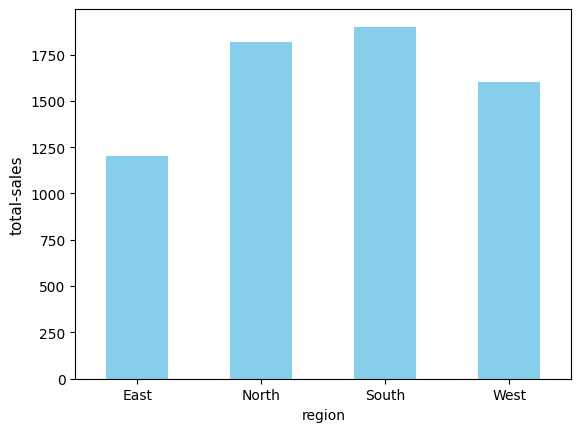

In [7]:
region.plot(kind='bar',color='skyblue')
plt.ylabel('total-sales',fontsize=11)
plt.xticks(rotation=0)
plt.show()

In [8]:
products=sales.groupby('product_category')['sales_amount'].sum().reset_index(name='sales')
products

,product_category,sales
0,Clothing,720
1,Electronics,2350
2,Home Appliances,1550
3,Sports,1900


In [9]:
total=sales.sales_amount.sum()
total

6520

In [10]:
products['sale_per']=(products['sales']/total)*100
products

,product_category,sales,sale_per
0,Clothing,720,11.042945
1,Electronics,2350,36.042945
2,Home Appliances,1550,23.773006
3,Sports,1900,29.141104


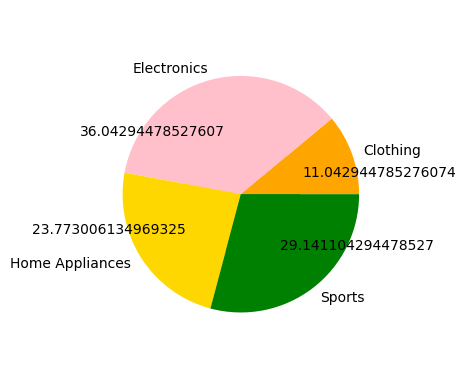

In [18]:
plt.pie(products['sales'],data=products,labels='product_category',radius=0.8,colors=['orange','pink','gold','green'])
plt.pie(products['sales'],data=products,labels='sale_per',radius=0.4,colors=['orange','pink','gold','green'])
plt.show()

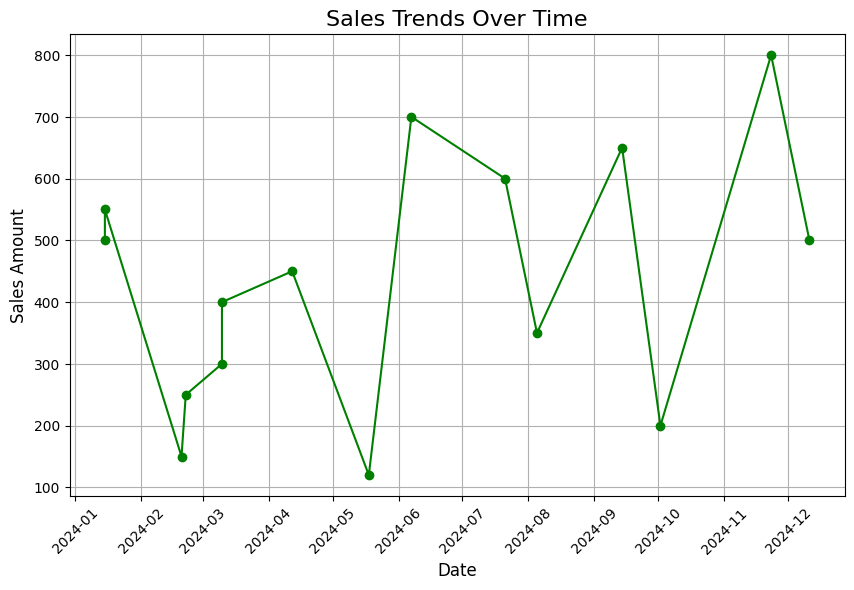

In [19]:
# Convert sales_date to datetime for proper sorting
sales['sales_date'] = pd.to_datetime(sales['sales_date'])
# Sort by date
sales = sales.sort_values('sales_date')
# Plotting
plt.figure(figsize=(10,6))
plt.plot(sales['sales_date'], sales['sales_amount'], marker='o', color='green')
plt.title('Sales Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [20]:
sales

,sale_id,customer_id,product_category,region,sales_date,sales_amount,units_sold
0,1,101,Electronics,North,2024-01-15,500,2
12,13,101,Sports,East,2024-01-15,550,3
1,2,102,Clothing,South,2024-02-20,150,3
13,14,112,Clothing,South,2024-02-22,250,2
2,3,103,Home Appliances,East,2024-03-10,300,1
14,15,103,Home Appliances,North,2024-03-10,400,2
3,4,101,Electronics,West,2024-04-12,450,1
4,5,104,Clothing,North,2024-05-18,120,2
5,6,105,Sports,South,2024-06-07,700,4
6,7,106,Electronics,North,2024-07-21,600,3


In [21]:
units=sales.groupby('region')['units_sold'].sum()

In [22]:
units

region
East      6
North    13
South    11
West      5
Name: units_sold, dtype: int64

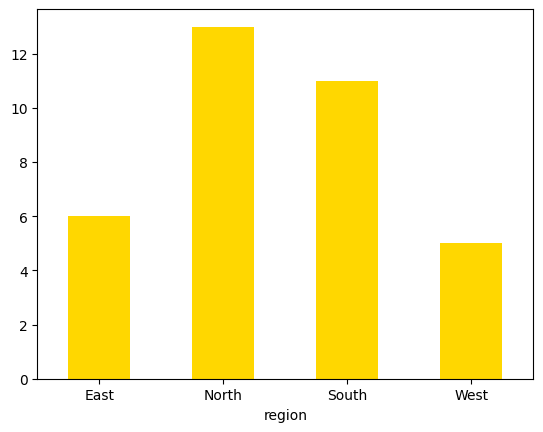

In [23]:
units.plot(kind='bar',color='gold')
plt.xticks(rotation=0)
plt.show()

In [24]:
sales=sales.sort_values('sales_amount')

In [25]:
sales

,sale_id,customer_id,product_category,region,sales_date,sales_amount,units_sold
4,5,104,Clothing,North,2024-05-18,120,2
1,2,102,Clothing,South,2024-02-20,150,3
9,10,109,Clothing,North,2024-10-02,200,4
13,14,112,Clothing,South,2024-02-22,250,2
2,3,103,Home Appliances,East,2024-03-10,300,1
7,8,107,Home Appliances,East,2024-08-05,350,2
14,15,103,Home Appliances,North,2024-03-10,400,2
3,4,101,Electronics,West,2024-04-12,450,1
0,1,101,Electronics,North,2024-01-15,500,2
11,12,111,Home Appliances,West,2024-12-11,500,1


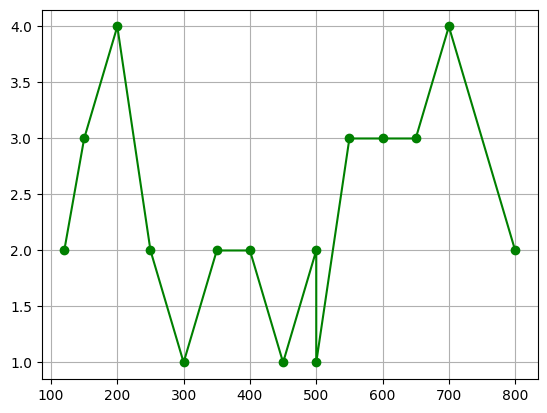

In [26]:
# plt.scatter(x='sales_amount',y='units_sold',data=sales,color='gold',marker='^')
plt.plot(sales['sales_amount'],sales['units_sold'],color='green',marker='o')
plt.grid(True)
plt.show()

In [27]:
regions=sales.region.unique()

In [28]:
regions

array(['North', 'South', 'East', 'West'], dtype=object)

In [29]:
len(regions)

4

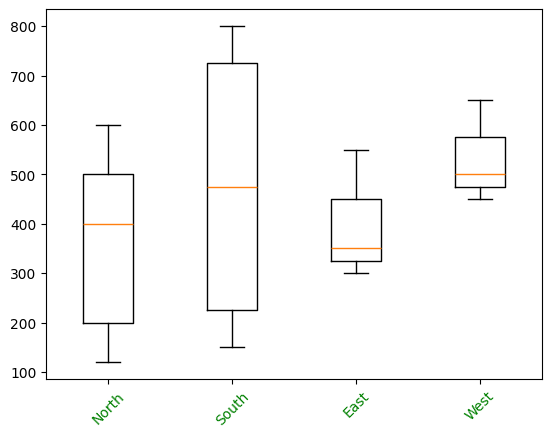

In [30]:
for i in range(len(regions)):
    plt.boxplot(x='sales_amount',data=sales[sales['region']==regions[i]],positions=[i],widths=0.4,whis=1.5)
plt.xticks(ticks=[0,1,2,3],labels=regions,color='green',rotation=45)
plt.show()

In [31]:
total=sales.groupby('region')['sales_amount'].sum().reset_index(name='total_sales')
total

,region,total_sales
0,East,1200
1,North,1820
2,South,1900
3,West,1600


In [32]:
units=sales.groupby('region')['units_sold'].sum().reset_index(name='total_units')
units

,region,total_units
0,East,6
1,North,13
2,South,11
3,West,5


In [33]:
merged=pd.merge(total,units,how='left',on='region')
merged

,region,total_sales,total_units
0,East,1200,6
1,North,1820,13
2,South,1900,11
3,West,1600,5


In [34]:
merged['avg']=merged['total_sales']/merged['total_units']

In [35]:
merged

,region,total_sales,total_units,avg
0,East,1200,6,200.000000
1,North,1820,13,140.000000
2,South,1900,11,172.727273
3,West,1600,5,320.000000


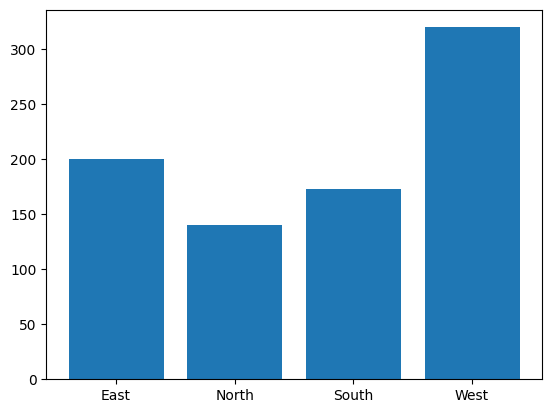

In [36]:
plt.bar(x='region',height='avg',data=merged)
plt.show()

In [37]:
total=sales.groupby('customer_id')['sales_amount'].sum().reset_index(name='total_sales')
total

,customer_id,total_sales
0,101,1500
1,102,150
2,103,700
3,104,120
4,105,700
5,106,600
6,107,350
7,108,650
8,109,200
9,110,800


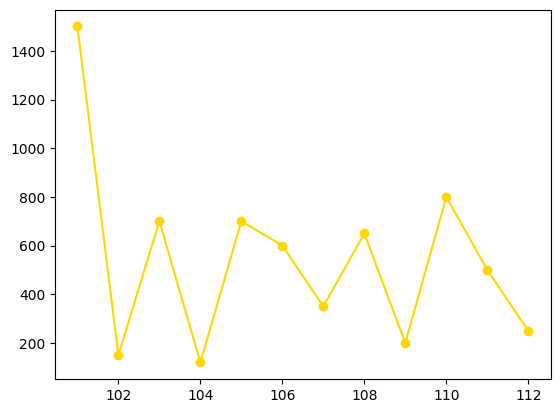

In [38]:
plt.plot(total['customer_id'],total['total_sales'],color='gold',marker='o')
plt.show()

In [39]:
electronics=sales[sales['product_category']=='Electronics']
electronics

,sale_id,customer_id,product_category,region,sales_date,sales_amount,units_sold
3,4,101,Electronics,West,2024-04-12,450,1
0,1,101,Electronics,North,2024-01-15,500,2
6,7,106,Electronics,North,2024-07-21,600,3
10,11,110,Electronics,South,2024-11-23,800,2


In [40]:
electronics['sales_date'] = pd.to_datetime(electronics['sales_date'])
electronics = electronics.sort_values('sales_date')
electronics

/tmp/ipykernel_8914/2140850594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electronics['sales_date'] = pd.to_datetime(electronics['sales_date'])


,sale_id,customer_id,product_category,region,sales_date,sales_amount,units_sold
0,1,101,Electronics,North,2024-01-15,500,2
3,4,101,Electronics,West,2024-04-12,450,1
6,7,106,Electronics,North,2024-07-21,600,3
10,11,110,Electronics,South,2024-11-23,800,2


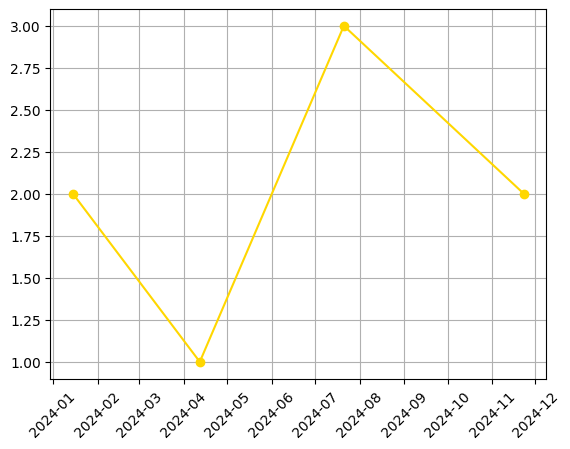

In [41]:
plt.plot(electronics['sales_date'],electronics['units_sold'],marker='o',color='gold')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [42]:
employees=pd.read_csv('/home/eeswar/Downloads/datasets/employee.csv',sep='\t')

In [43]:
employees

,employee_id,department,salary,years_of_experience,age,gender
0,1,HR,50000,5,29,Female
1,2,IT,70000,8,34,Male
2,3,Sales,55000,6,31,Female
3,4,IT,80000,10,39,Male
4,5,Finance,60000,7,35,Female
5,6,HR,52000,4,28,Male
6,7,Finance,75000,9,40,Male
7,8,Sales,58000,6,30,Female
8,9,IT,67000,7,33,Female
9,10,Sales,60000,8,36,Male


In [44]:
plots=employees.groupby('department')['salary'].mean().reset_index(name='avg')

In [45]:
plots

,department,avg
0,Finance,67500.000000
1,HR,51000.000000
2,IT,72333.333333
3,Sales,57666.666667


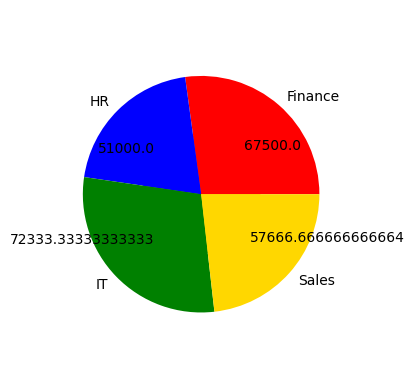

In [46]:
plt.pie(plots['avg'],data=plots,labels=plots['department'],radius=0.8,colors=['red','blue','green','gold'])
plt.pie(plots['avg'],data=plots,labels=plots['avg'],radius=0.4,colors=['red','blue','green','gold'])
plt.show()

In [56]:
employees['salary']=pd.to_numeric(employees['salary'])

In [57]:
employees=employees.sort_values('years_of_experience')

In [58]:
employees

,employee_id,department,salary,years_of_experience,age,gender
5,6,HR,52000,4,28,Male
0,1,HR,50000,5,29,Female
2,3,Sales,55000,6,31,Female
7,8,Sales,58000,6,30,Female
4,5,Finance,60000,7,35,Female
8,9,IT,67000,7,33,Female
1,2,IT,70000,8,34,Male
9,10,Sales,60000,8,36,Male
6,7,Finance,75000,9,40,Male
3,4,IT,80000,10,39,Male


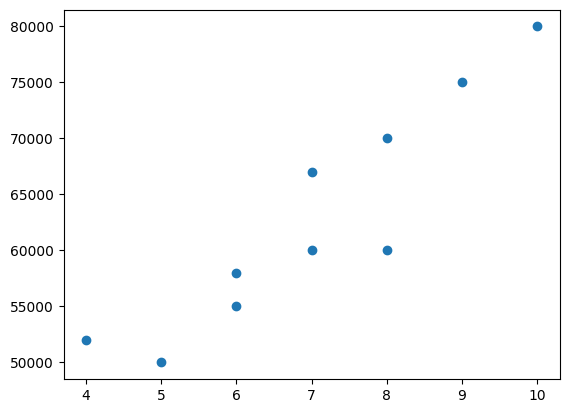

In [59]:
plt.scatter(x='years_of_experience',y='salary',data=employees)
plt.show()

In [60]:
employees=employees.sort_values('employee_id')

In [61]:
employees

,employee_id,department,salary,years_of_experience,age,gender
0,1,HR,50000,5,29,Female
1,2,IT,70000,8,34,Male
2,3,Sales,55000,6,31,Female
3,4,IT,80000,10,39,Male
4,5,Finance,60000,7,35,Female
5,6,HR,52000,4,28,Male
6,7,Finance,75000,9,40,Male
7,8,Sales,58000,6,30,Female
8,9,IT,67000,7,33,Female
9,10,Sales,60000,8,36,Male


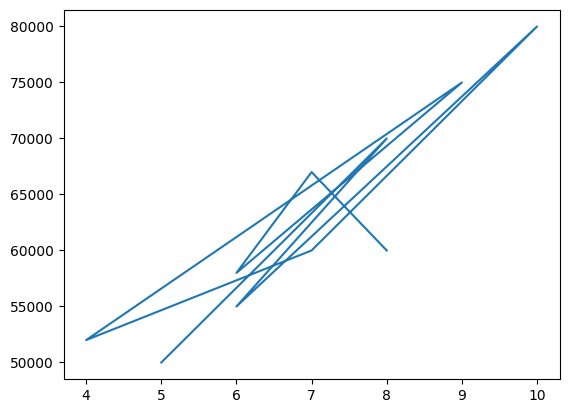

In [62]:
plt.plot(employees['years_of_experience'],employees['salary'])
plt.show()

In [63]:
employees=employees.sort_values('years_of_experience')

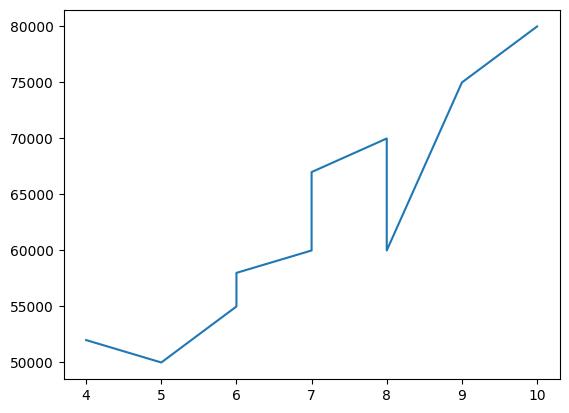

In [64]:
plt.plot(employees['years_of_experience'],employees['salary'])
plt.show()

In [65]:
employees

,employee_id,department,salary,years_of_experience,age,gender
5,6,HR,52000,4,28,Male
0,1,HR,50000,5,29,Female
2,3,Sales,55000,6,31,Female
7,8,Sales,58000,6,30,Female
4,5,Finance,60000,7,35,Female
8,9,IT,67000,7,33,Female
1,2,IT,70000,8,34,Male
9,10,Sales,60000,8,36,Male
6,7,Finance,75000,9,40,Male
3,4,IT,80000,10,39,Male


In [66]:
arr=employees.department.unique()

In [67]:
arr

array(['HR', 'Sales', 'Finance', 'IT'], dtype=object)

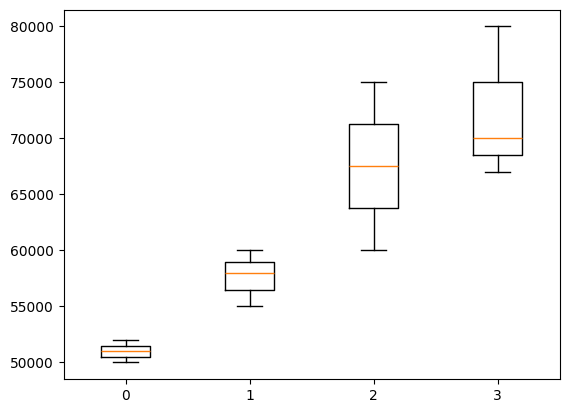

In [68]:
for i in range(len(arr)):
    plt.boxplot('salary',data=employees[employees['department']==arr[i]],positions=[i],widths=0.4,whis=1.5)
plt.show()

In [69]:
employees=employees.sort_values('employee_id')
employees

,employee_id,department,salary,years_of_experience,age,gender
0,1,HR,50000,5,29,Female
1,2,IT,70000,8,34,Male
2,3,Sales,55000,6,31,Female
3,4,IT,80000,10,39,Male
4,5,Finance,60000,7,35,Female
5,6,HR,52000,4,28,Male
6,7,Finance,75000,9,40,Male
7,8,Sales,58000,6,30,Female
8,9,IT,67000,7,33,Female
9,10,Sales,60000,8,36,Male


In [70]:
df_male=employees[employees['gender']=='Male']

In [71]:
df_female=employees[employees['gender']=='Female']

In [72]:
male_grp=df_male.groupby('department')['salary'].mean().to_frame().reset_index()

In [73]:
female_grp=df_female.groupby('department')['salary'].mean().to_frame().reset_index()

In [74]:
df_male

,employee_id,department,salary,years_of_experience,age,gender
1,2,IT,70000,8,34,Male
3,4,IT,80000,10,39,Male
5,6,HR,52000,4,28,Male
6,7,Finance,75000,9,40,Male
9,10,Sales,60000,8,36,Male


In [75]:
female_grp

,department,salary
0,Finance,60000.0
1,HR,50000.0
2,IT,67000.0
3,Sales,56500.0


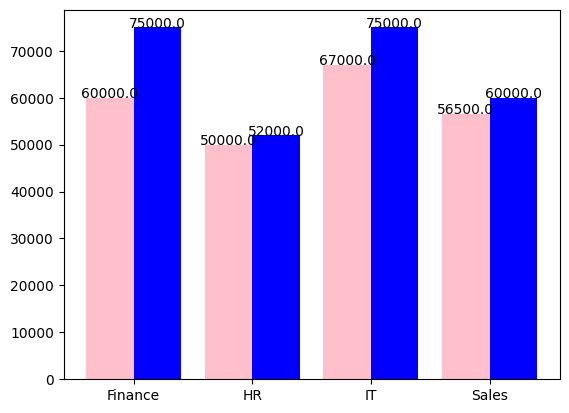

In [76]:
plt.bar(x='department',height='salary',data=male_grp,color='blue',align='edge',width=0.4)
plt.bar(x='department',height='salary',data=female_grp,color='pink',align='edge',width=-0.4)
for i in range(len(male_grp)):
    plt.text(i+0.2,male_grp['salary'][i]+4,male_grp['salary'][i],ha='center')
for i in range(len(female_grp)):
    plt.text(i-0.2,female_grp['salary'][i]+2,female_grp['salary'][i],ha='center')
plt.show()

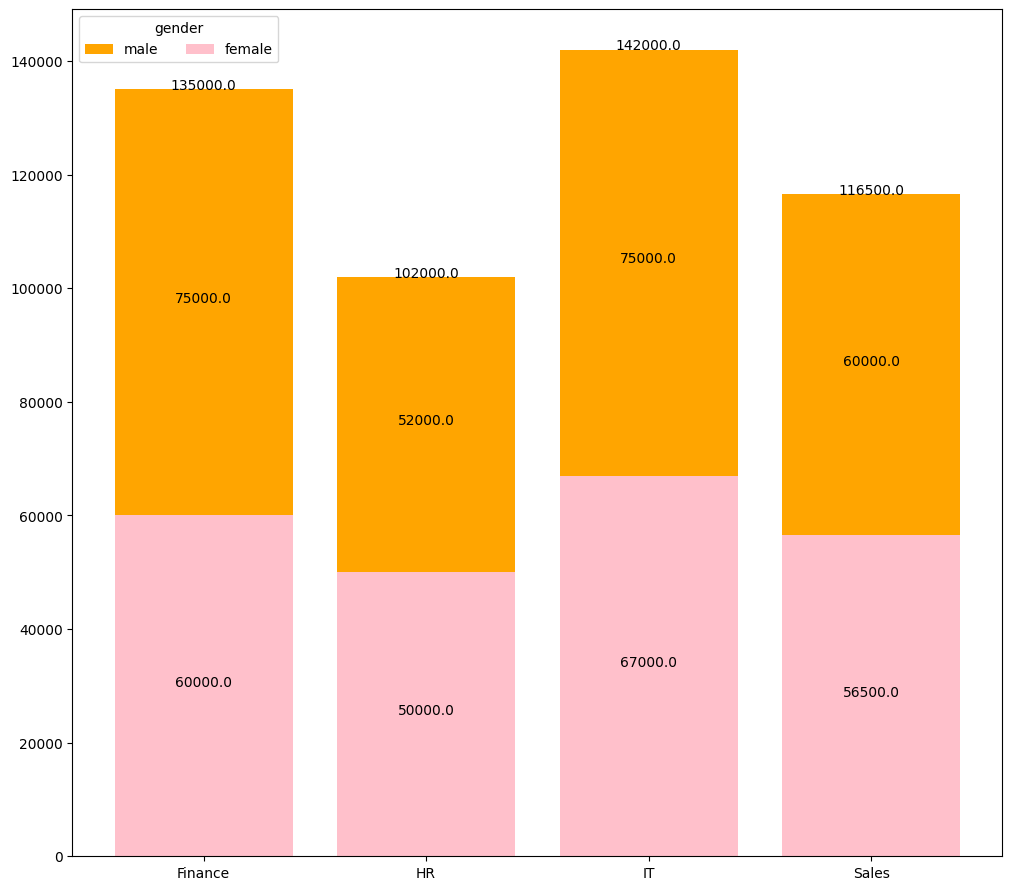

In [77]:
plt.figure(figsize=[12,11])
plt.bar(x='department',height='salary',data=male_grp,bottom=female_grp['salary'],label='male',color='orange')
plt.bar(x='department',height='salary',data=female_grp,label='female',color='pink')
plt.legend(title='gender',ncols=2,loc='upper left')
for i in range(len(female_grp)):
    plt.text(i,female_grp['salary'][i]/2,female_grp['salary'][i],ha='center')
for i in range(len(male_grp)):
    plt.text(i,female_grp['salary'][i]+male_grp['salary'][i]/2,male_grp['salary'][i],ha='center')
for i in range(len(male_grp)):
    plt.text(i,female_grp['salary'][i]+male_grp['salary'][i]+4,female_grp['salary'][i]+male_grp['salary'][i],ha='center')
plt.show()

In [47]:
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


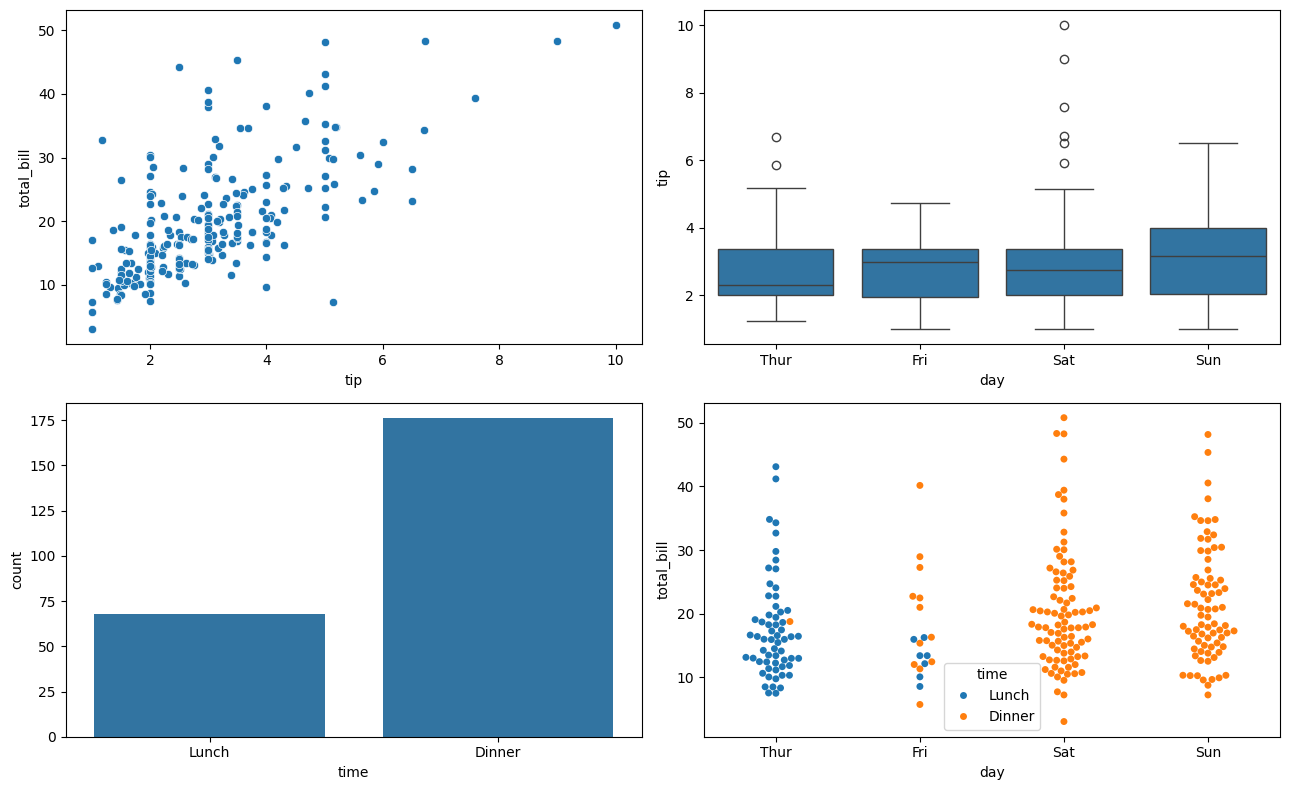

In [52]:
plt.figure(figsize=[13,8])
plt.subplot(2,2,1)
sns.scatterplot(x='tip',y='total_bill',data=tips)
plt.subplot(2,2,2)
sns.boxplot(x='day',y='tip',data=tips)
plt.subplot(2,2,3)
sns.countplot(x='time',data=tips)
plt.subplot(2,2,4)
sns.swarmplot(x='day',y='total_bill',data=tips,hue='time')
plt.tight_layout()
plt.show()

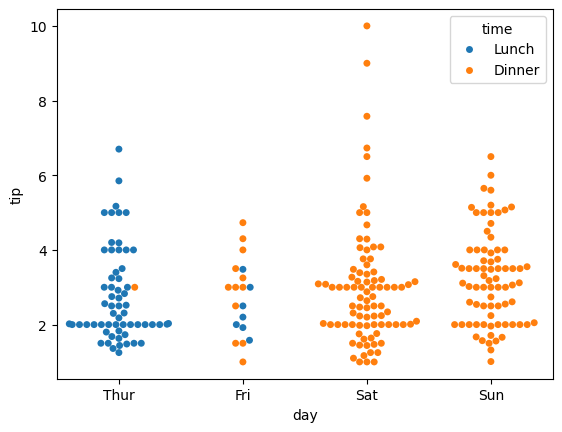

In [80]:
sns.swarmplot(x='day',y='tip',data=tips,hue='time')
plt.show()

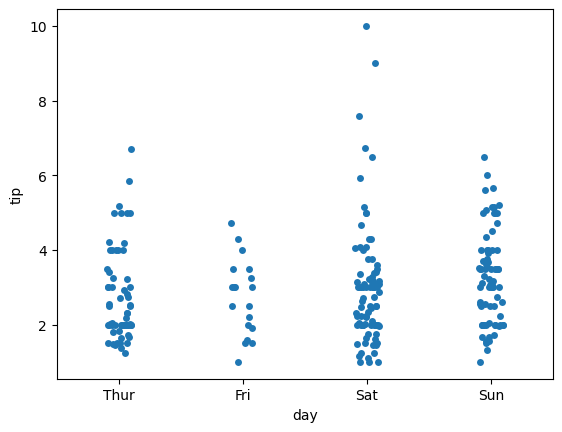

In [85]:
sns.stripplot(x='day',y='tip',data=tips)
plt.show()